In [46]:
import pandas as pd

In [47]:
df= pd.read_excel('4.1.1.xlsx', sheet_name='Goal4')
df.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,BasePeriod,Source,GeoInfoUrl,FootNote,Education level,Nature,Reporting Type,Sex,Type of skill,Units
0,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,1,World,2000,48.97526,2000,...,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,PRIMAR,N,G,BOTHSEX,SKILL_MATH,PERCENT
1,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,1,World,2000,62.31563,2000,...,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,LOWSEC,N,G,BOTHSEX,SKILL_READ,PERCENT
2,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,1,World,2000,61.21205,2000,...,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,PRIMAR,N,G,BOTHSEX,SKILL_READ,PERCENT
3,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,1,World,2000,47.31352,2000,...,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,LOWSEC,N,G,BOTHSEX,SKILL_MATH,PERCENT
4,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,1,World,2001,47.49661,2001,...,NaN,UNESCO Institute for Statistics. Data extract...,NaN,NaN,LOWSEC,N,G,BOTHSEX,SKILL_MATH,PERCENT


In [48]:
df= df.drop(['Goal', 'Target', 'Nature', 'Reporting Type', 'Indicator', 'SeriesCode', 'GeoAreaCode', 'SeriesDescription', 'Source', 'Units', 'TimeCoverage', 'UpperBound', 'LowerBound', 'BasePeriod', 'GeoInfoUrl', 'FootNote', 'Time_Detail'], axis=1)
df.head()


,GeoAreaName,TimePeriod,Value,Education level,Sex,Type of skill
0,World,2000,48.97526,PRIMAR,BOTHSEX,SKILL_MATH
1,World,2000,62.31563,LOWSEC,BOTHSEX,SKILL_READ
2,World,2000,61.21205,PRIMAR,BOTHSEX,SKILL_READ
3,World,2000,47.31352,LOWSEC,BOTHSEX,SKILL_MATH
4,World,2001,47.49661,LOWSEC,BOTHSEX,SKILL_MATH


In [49]:
df.nunique()

GeoAreaName         143
TimePeriod           23
Value              5182
Education level       3
Sex                   3
Type of skill         2
dtype: int64

In [50]:
df.isnull().sum()

GeoAreaName        0
TimePeriod         0
Value              0
Education level    0
Sex                0
Type of skill      0
dtype: int64

In [51]:
df_indo = df.loc[df['GeoAreaName'] == 'China, Hong Kong Special Administrative Region']
df_indo.head(90)

,GeoAreaName,TimePeriod,Value,Education level,Sex,Type of skill
2057,"China, Hong Kong Special Administrative Region",2000,91.71,LOWSEC,MALE,SKILL_MATH
2058,"China, Hong Kong Special Administrative Region",2000,93.66,LOWSEC,FEMALE,SKILL_READ
2059,"China, Hong Kong Special Administrative Region",2000,91.00,LOWSEC,BOTHSEX,SKILL_READ
2060,"China, Hong Kong Special Administrative Region",2000,92.23,LOWSEC,FEMALE,SKILL_MATH
2061,"China, Hong Kong Special Administrative Region",2000,88.15,LOWSEC,MALE,SKILL_READ
...,...,...,...,...,...,...
2130,"China, Hong Kong Special Administrative Region",2022,79.13,LOWSEC,MALE,SKILL_READ
2131,"China, Hong Kong Special Administrative Region",2022,86.16,LOWSEC,BOTHSEX,SKILL_MATH
2132,"China, Hong Kong Special Administrative Region",2022,84.80,LOWSEC,MALE,SKILL_MATH
2133,"China, Hong Kong Special Administrative Region",2022,86.43,LOWSEC,FEMALE,SKILL_READ


In [52]:
df_indo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 2057 to 2134
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GeoAreaName      78 non-null     object 
 1   TimePeriod       78 non-null     int64  
 2   Value            78 non-null     float64
 3   Education level  78 non-null     object 
 4   Sex              78 non-null     object 
 5   Type of skill    78 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


In [53]:
df_indo['Education level'].unique()

array(['LOWSEC', 'PRIMAR'], dtype=object)

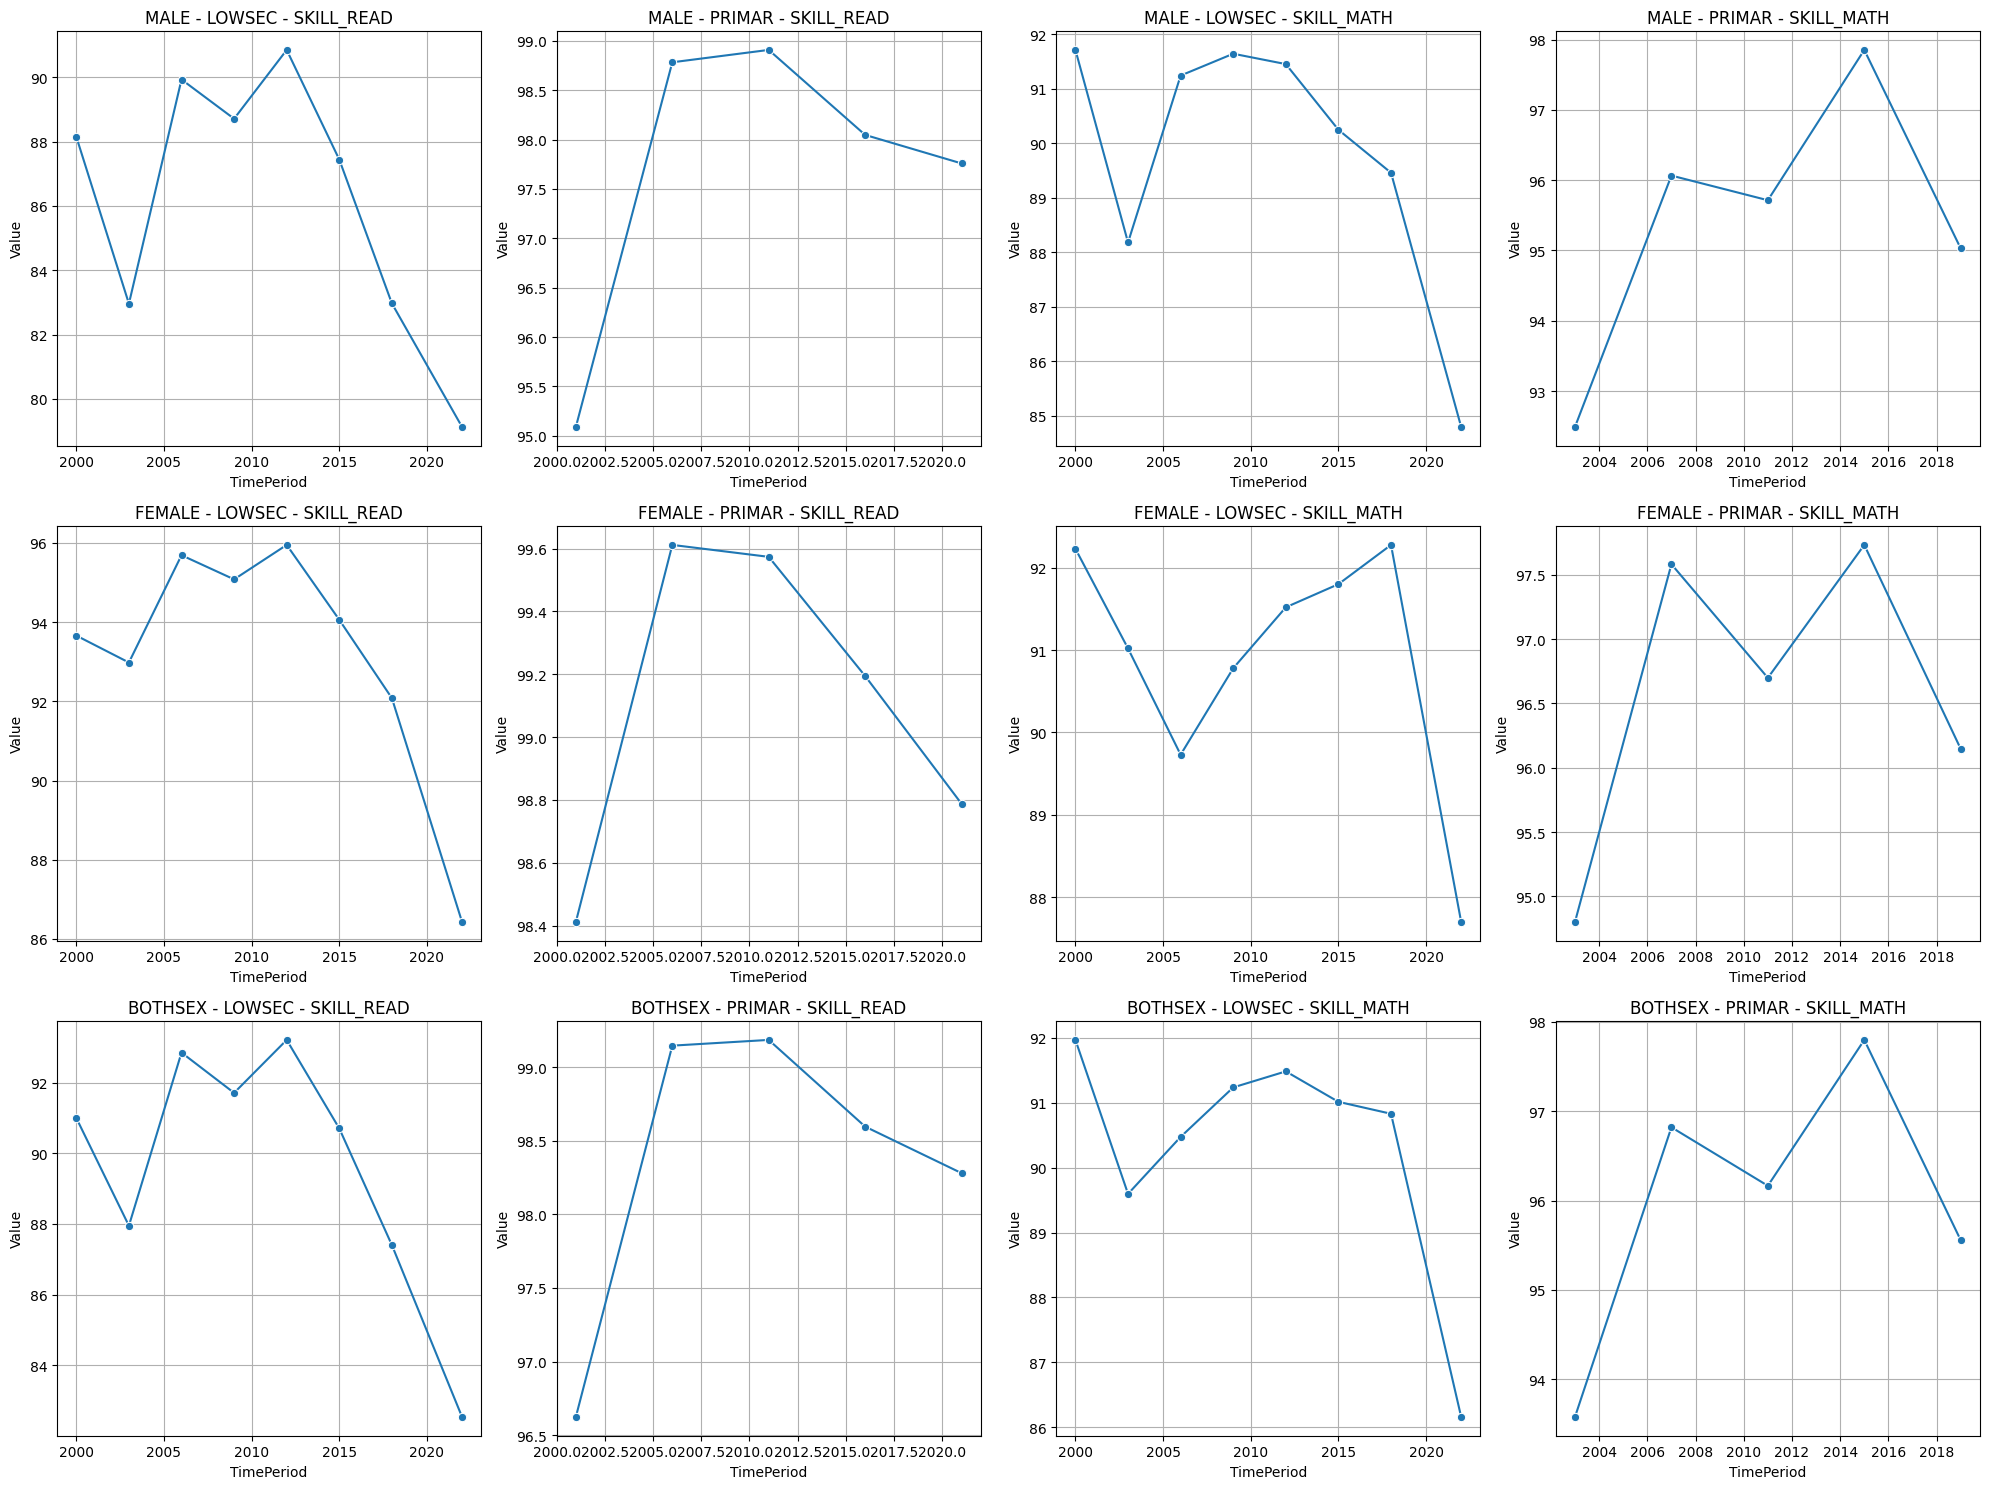

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

genders = ['MALE', 'FEMALE', 'BOTHSEX']
skills = ['SKILL_READ', 'SKILL_MATH']
educations = ['LOWSEC', 'PRIMAR']

# Tentukan jumlah baris dan kolom untuk subplots
nrows = len(genders)
ncols = len(skills) * len(educations)

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))

# Iterasi melalui tiap gender, skill, dan education level
for i, gender in enumerate(genders):
    for j, skill in enumerate(skills):
        for k, education in enumerate(educations):
            # Filter data untuk masing-masing gender, skill, dan education level
            data_filtered = df_indo[
                (df_indo['Sex'] == gender) &
                (df_indo['Type of skill'] == skill) &
                (df_indo['Education level'] == education)
            ]
            
            # Menentukan posisi subplot
            col_index = j * len(educations) + k
            
            # Plotkan line graph untuk masing-masing gender, skill, dan education level
            sns.lineplot(data=data_filtered, x='TimePeriod', y='Value', ax=ax[i, col_index], marker='o', errorbar=None)
            
            # Set title dan label
            ax[i, col_index].set_title(f'{gender} - {education} - {skill}')
            ax[i, col_index].set_xlabel('TimePeriod')
            ax[i, col_index].set_ylabel('Value')
            ax[i, col_index].grid(True)

# Menyempurnakan layout agar tidak overlap
plt.tight_layout()

# Menampilkan plot
plt.show()


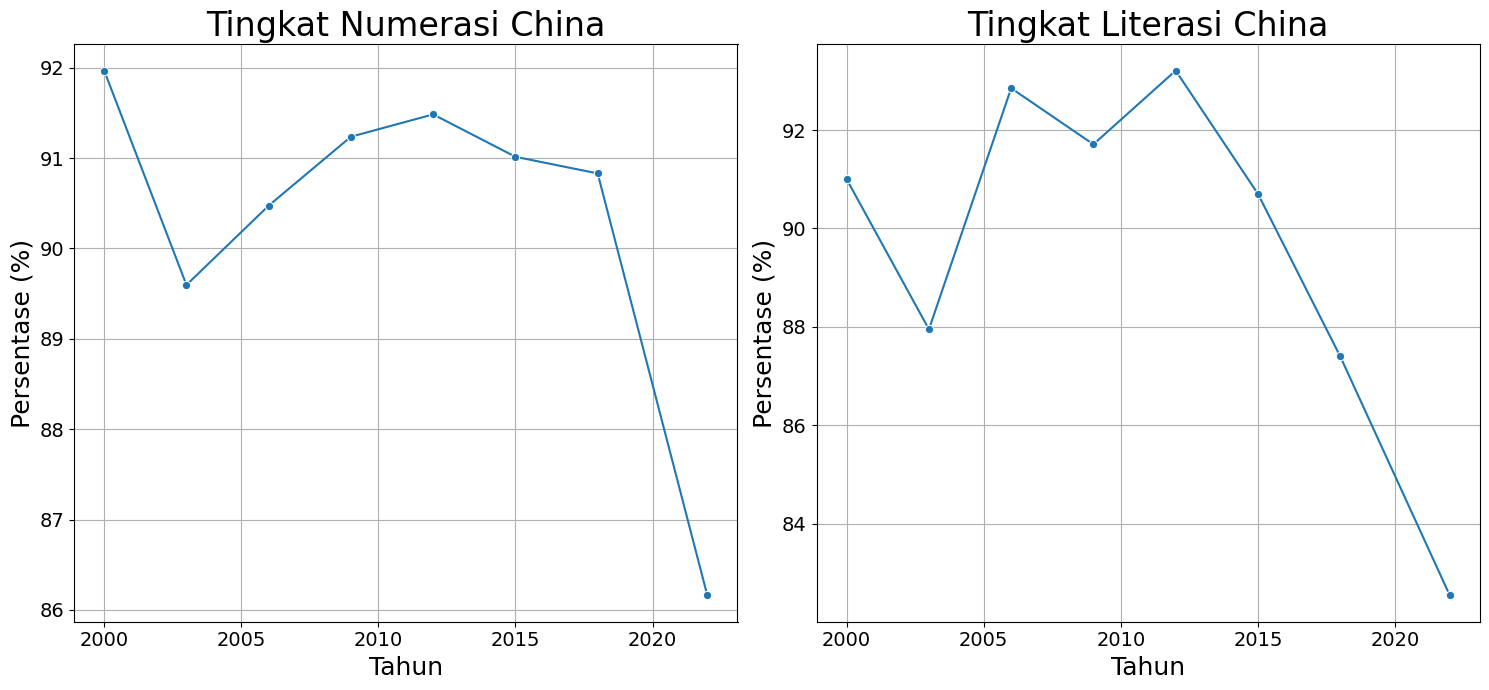

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

skills = ['SKILL_MATH', 'SKILL_READ']
education = 'LOWSEC'
gender = 'BOTHSEX'

fig, ax = plt.subplots(nrows=1, ncols=len(skills), figsize=(15, 7))

# Iterating through each skill
for j, skill in enumerate(skills):
    # Filter data
    data_filtered = df_indo[
        (df_indo['Sex'] == gender) &
        (df_indo['Type of skill'] == skill) &
        (df_indo['Education level'] == education)
    ]

    # Plot line graph for each skill
    sns.lineplot(data=data_filtered, x='TimePeriod', y='Value', ax=ax[j], marker='o')

    # Set title and labels based on the skill type
    if skill == 'SKILL_READ':
        ax[j].set_title('Tingkat Literasi China', fontsize=24)
    elif skill == 'SKILL_MATH':
        ax[j].set_title('Tingkat Numerasi China', fontsize=24)
    
    ax[j].set_xlabel('Tahun', fontsize=18)
    ax[j].set_ylabel('Persentase (%)', fontsize=18)
    
    # Increase font size of x-axis and y-axis tick labels
    ax[j].tick_params(axis='x', labelsize=14)  # X-axis tick labels
    ax[j].tick_params(axis='y', labelsize=14)  # Y-axis tick labels
    
    ax[j].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


## Penjelasan
Value dalam dataset tersebut (indikator 4.1.1) merepresentasikan proporsi masyarakat yang berada pada jenjang pendidikan tertenu (Education Level) yang mahir dalam membaca dan menghitung berdasarkan jenis kelaminnya. 

Sebagai contoh:
- Jika value adalah 55.5 untuk kategori "Male - Lowsec - Skill_Read" , ini berarti sekitar 55.5% dari laki-laki berusia yang berpendidikan lower secondary (pendidikan wajib bagi usia 12-16 tahun) di Indonesia mahir dalam membaca.
- Jika value adalah 70 untuk kategori "Female - Lowsec - Skill_Math" , ini berarti sekitar 70% dari perempuan berusia yang berpendidikan lower secondary (pendidikan wajib bagi usia 12-16 tahun) di Indonesia mahir dalam berhitung sederhana.